In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

ipl_2024=pd.read_csv('IPL2024_match.csv')

ipl_2024=pd.DataFrame(ipl_2024).dropna()

In [38]:
#teams Colors
colors=['purple','pink','orange','yellow','red','maroon','lightblue','silver','lavender','blue']

In [40]:
ipl_2024['match_no'].duplicated() # To removes duplicates
ipl_2024.dropna()  # To remove Nan or null values 

,match_no,city,date_of_match,venue,Home_team,Away_team,toss_winner,toss_decision,winner,man_of_the_match,result,result_margin,eliminator,umpire1,umpire2
0,1.0,Chennai,3/22/2024,MA Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,Bat,Chennai Super Kings,Mustafizur Rahman,wicket,6,N,Saiyed Khalid,Virender Sharma
1,2.0,Chandigarh,3/23/2024,Maharaja Yadavindra Singh International Cricke...,Punjab Kings,Delhi Capitals,Punjab Kings,Bowl,Punjab Kings,Sam Curran,wicket,4,N,Jayaraman Madanagopal,Nikhil Patwardhan
2,3.0,Kolkata,3/23/2024,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Bowl,Kolkata Knight Riders,Andre Russel,runs,4,N,Rohan Pandit,Yeshwant Barde
3,4.0,Jaipur,3/24/2024,Sawai mansingh Stadium,Rajasthan Royals,Lucknow Super Giants,Rajasthan Royals,Bowl,Rajasthan Royals,Sanju Samson,runs,20,N,Akshay Totre,Kumar Dharmasena
4,5.0,Ahmedabad,3/24/2024,Narendra Modi Stadium,Gujarat Titans,Mumbai Indians,Mumbai Indians,Bowl,Gujarat Titans,Sai Sudarshan,runs,6,N,Vineet Kulkarni,Virender Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69.0,Hyderabad,5/19/2024,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,Bat,Sunrisers Hyderabad,Abhishek Sharma,wkts,4,N,Nitin Menon,Virender Sharma
69,70.0,Guwahati,5/19/2024,Barsapara Cricket Stadium,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,Bowl,No Result,No Result,Rain,Rain,N,Sai Darshan Kumar,Rohan Pandit
70,71.0,Ahmedabad,5/21/2024,Narendra Modi Stadium,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Bat,Kolkata Knight Riders,Mitchell Starc,wkts,8,Y,Anil Chaudhary,Rohan Pandit
71,72.0,Ahmedabad,5/22/2024,Narendra Modi Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,Bowl,Rajasthan Royals,R Ashwin,wkts,4,Y,KN Anatha Padmanabhan,Sai Darshan Kumar


In [43]:
total_matches_played=ipl_2024['match_no'].count() #total matches playes in ipl 2024
total_venues=ipl_2024['city'].value_counts().count() # total venues where matches played
total_days=ipl_2024['date_of_match'].value_counts().count()
print('Total Matches Playes :',total_matches_played,'  Total venues :',total_venues , '  No of Days :',total_days)

Total Matches Playes : 73   Total venues : 14   No of Days : 62


In [45]:
#Teams Wins
fn=['Chennai Super Kings' ,'Punjab Kings' ,'Kolkata Knight Riders' ,'Rajasthan Royals','Gujarat Titans', 'Royal Challengers Bangalore' ,'Sunrisers Hyderabad','Lucknow Super Giants' ,'Delhi Capitals', 'Mumbai Indians']
Teams=['CSK','PK','KKR','RR','GT','RCB','SRH','LSG','DC','MI']
colors=['Yellow','gray','black','pink','silver','red','orange','purple','skyblue','blue']
for i in range(0,len(fn)):
    ipl_2024['Home_team']=ipl_2024['Home_team'].replace(fn[i],Teams[i])
    ipl_2024['winner']=ipl_2024['winner'].replace(fn[i],Teams[i])
    ipl_2024['Away_team']=ipl_2024['Away_team'].replace(fn[i],Teams[i])
    ipl_2024['toss_winner']=ipl_2024['toss_winner'].replace(fn[i],Teams[i])
ipl_2024=ipl_2024.drop(ipl_2024[ipl_2024['winner']=='No Result'].index)
ipl_2024['Home_team'].head(10)

0    CSK
1     PK
2    KKR
3     RR
4     GT
5    RCB
6    CSK
7    SRH
8     RR
9    RCB
Name: Home_team, dtype: object

In [47]:
Team_wins_count=pd.DataFrame(Team_wins_count)
Team_wins_count

,count
winner,
KKR,10
RR,10
SRH,9
CSK,7
RCB,7
LSG,7
DC,7
PK,5
GT,4


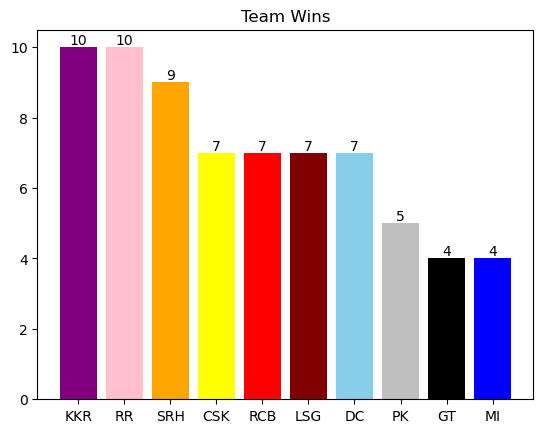

In [49]:
Team_wins_count=ipl_2024['winner'].value_counts()

Team_wins=mp.bar(Team_wins_count.keys(),Team_wins_count,color=['purple','pink','orange','yellow','red','maroon','skyblue','silver','black','blue'])
mp.title('Team Wins')
for bar in Team_wins:
    height = bar.get_height()  # Get the height of the bar (which is the value)
    mp.text(bar.get_x() + bar.get_width()/2, height,  # Position of the number (on top of the bar)
            str(height),  # The value to display
            ha='center',  # Horizontal alignment
            va='bottom',# Vertical alignment (so the text appears above the bar)
            fontsize=10)
mp.show()

result
Batting Second    35
Batting First     35
Name: count, dtype: int64


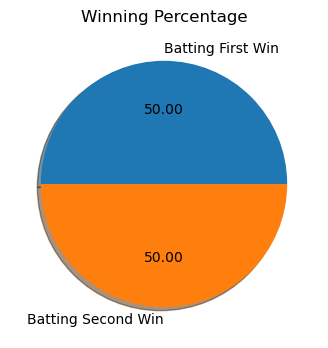

In [51]:
#batting vise winning Percentage
mp.figure(figsize=(4,4))
ipl_2024['result']=ipl_2024['result'].replace('runs','Batting First')
ipl_2024['result']=ipl_2024['result'].replace(['wkts','wicket'],'Batting Second')
ipl_2024['result']=ipl_2024['result'].replace('Rain','NO Result')
result_count=ipl_2024['result'].value_counts()
print(result_count)
mp.pie(result_count,labels=['Batting First Win','Batting Second Win'],autopct='%.2f', shadow=True)
mp.title('Winning Percentage')
mp.show()

winner
KKR    6
SRH    6
DC     5
CSK    4
LSG    4
RCB    4
RR     2
GT     2
MI     2
Name: count, dtype: int64


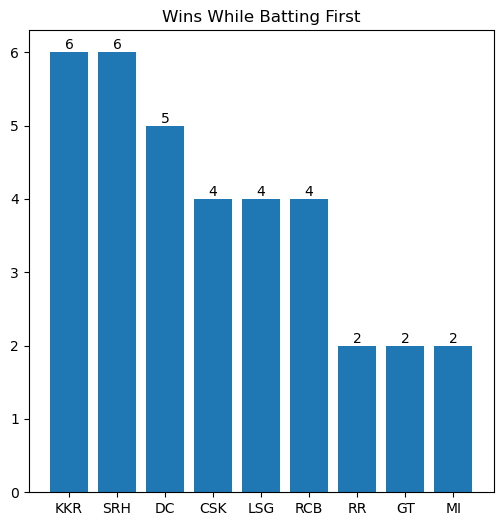

winner
RR     8
PK     5
KKR    4
CSK    3
RCB    3
SRH    3
LSG    3
GT     2
MI     2
DC     2
Name: count, dtype: int64


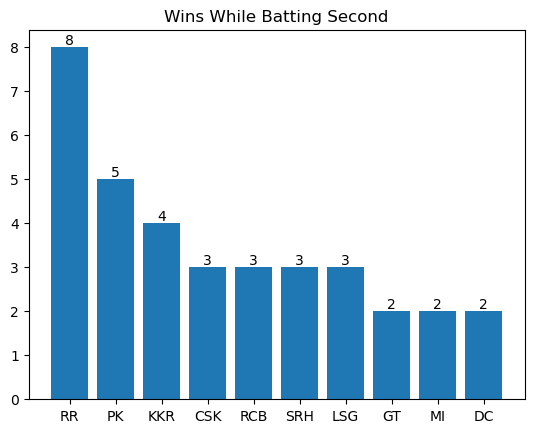

In [128]:
#batting First
#teams with batting First wins
#group_teams=ipl_2024.groupby('result').size()
#group_teams = ipl_2024.groupby('result')['winner'].value_counts() #shows batting first and second complete data
mp.figure(figsize=(6,6))
group_teams=ipl_2024[ipl_2024['result']=='Batting First']['winner'].value_counts()
print(group_teams)

batting_First=mp.bar(group_teams.keys(),group_teams)
mp.title('Wins While Batting First')
for bar in batting_First:
    height=bar.get_height()
    mp.text(bar.get_x()+bar.get_width()/2,height,str(height),ha='center',va='bottom',fontsize=10)
mp.show()


group_teams=ipl_2024[ipl_2024['result']=='Batting Second']['winner'].value_counts()
print(group_teams)

batting_Second=mp.bar(group_teams.keys(),group_teams)
mp.title('Wins While Batting Second')
for bar in batting_Second:
    height=bar.get_height()
    mp.text(bar.get_x()+bar.get_width()/2,height,str(height),ha='center',va='bottom',fontsize=10) 
mp.show()

result          winner
Batting First   KKR       6
                SRH       6
                DC        5
                CSK       4
                LSG       4
                RCB       4
                GT        2
                MI        2
                RR        2
Batting Second  RR        8
                PK        5
                KKR       4
                CSK       3
                LSG       3
                RCB       3
                SRH       3
                DC        2
                GT        2
                MI        2
Name: count, dtype: int64


/Users/saikumar/Downloads/Anaconda/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


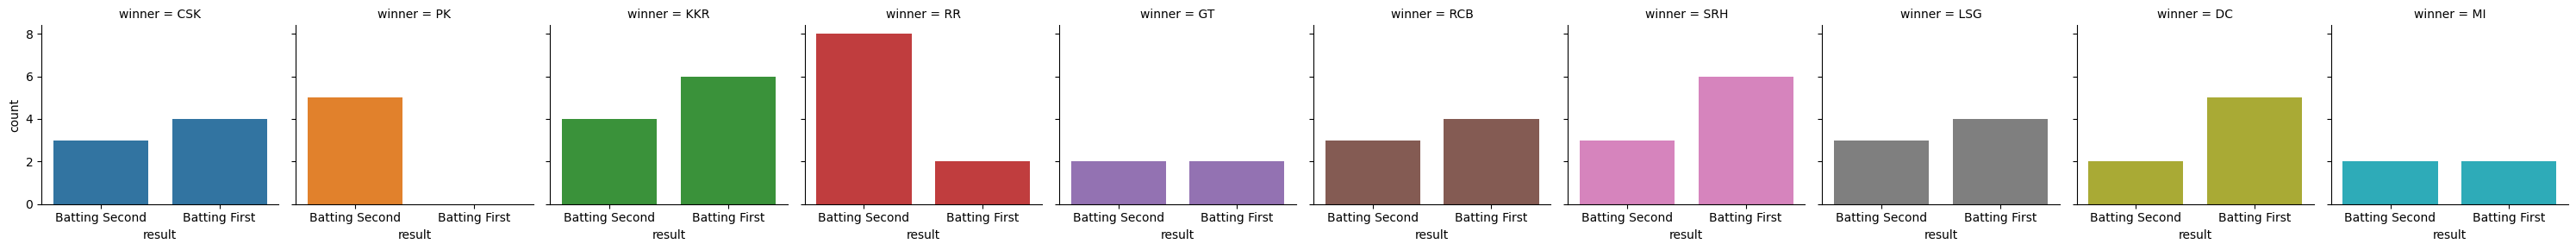

In [110]:
groupby_winners=group_teams=ipl_2024.groupby('result')['winner'].value_counts()
print(groupby_winners)
outcomes=sb.FacetGrid(ipl_2024,col='winner',hue='winner')
output=outcomes.map(sb.countplot,'result')
mp.show()

result          winner
Batting First   KKR       6
                SRH       6
                DC        5
                CSK       4
                LSG       4
                RCB       4
                GT        2
                MI        2
                RR        2
Batting Second  RR        8
                PK        5
                KKR       4
                CSK       3
                LSG       3
                RCB       3
                SRH       3
                DC        2
                GT        2
                MI        2
Name: count, dtype: int64


/Users/saikumar/Downloads/Anaconda/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


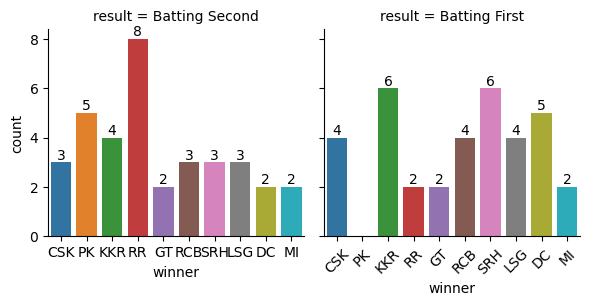

In [62]:
groupby_winners=group_teams=ipl_2024.groupby('result')['winner'].value_counts()
print(groupby_winners)
outcomes=sb.FacetGrid(ipl_2024,col='result',hue='winner')
output=outcomes.map(sb.countplot,'winner')
mp.xticks(rotation=45)
for ax in outcomes.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,int(height),ha='center',va='bottom',fontsize=10)
mp.show()

winner
KKR    10
RR     10
SRH     9
CSK     7
RCB     7
LSG     7
DC      7
PK      5
GT      4
MI      4
Name: count, dtype: int64


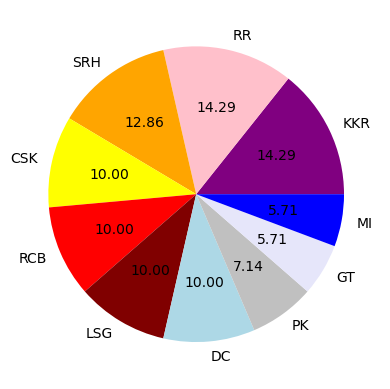

In [65]:
team_winPer=ipl_2024['winner'].value_counts()
print(team_winPer)
mp.pie(team_winPer,autopct='%.2f',labels=team_winPer.keys(),colors=['purple','pink','orange','yellow','red','maroon','lightblue','silver','lavender','blue'])
mp.show()

In [68]:
replace_val=ipl_2024['man_of_the_match'].replace('No Result',np.NaN).dropna() #replacing the No Result value to NaN and removing from data
top5=replace_val.value_counts().head(5)
print(top5)

man_of_the_match
Travis Head        3
Abhishek Sharma    3
Sunil Narine       3
Jos Buttler        2
Rishabh Pant       2
Name: count, dtype: int64


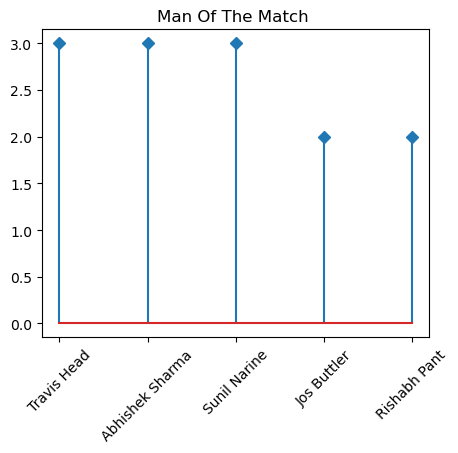

In [70]:
#most MOM's 
mp.figure(figsize=(5,4))
mom=mp.stem(top5.keys(),top5,markerfmt='D')
mp.title('Man Of The Match ')
mp.xticks(rotation=45)
mp.show()

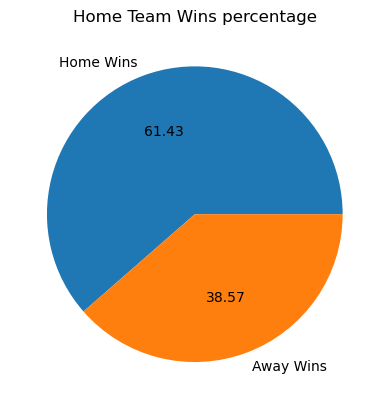

In [74]:
home_wins=(ipl_2024['Home_team']==ipl_2024['winner']).value_counts()
mp.pie(home_wins,autopct='%.2f',labels=['Home Wins','Away Wins'])
mp.title('Home Team Wins percentage')
mp.show()
#mp.pie(home_wins)
#print(home_wins,'/',total_matches_played)

In [76]:
#Home wins of each Team

ipl_2024['Home_wins']=ipl_2024['Home_team']==ipl_2024['winner']
ipl_2024['Home_wins'].value_counts()

home_wins=ipl_2024[ipl_2024['Home_wins']==True]['winner'].value_counts()
home_wins

winner
KKR    6
RR     6
SRH    6
CSK    5
DC     5
RCB    4
LSG    4
GT     3
MI     3
PK     1
Name: count, dtype: int64

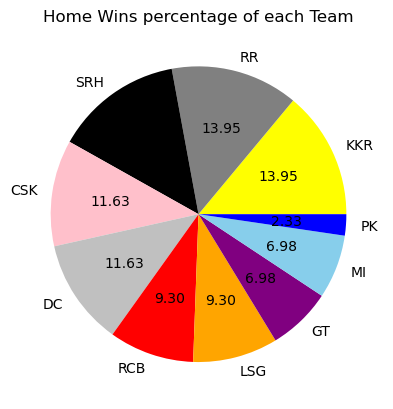

In [78]:
mp.pie(home_wins,autopct='%.2f',labels=home_wins.keys(),colors=colors)
mp.title('Home Wins percentage of each Team')
mp.show()

In [81]:
#Each Team's Home Wins and Away wins
total_match_count=ipl_2024['winner'].value_counts()
#sb.barplot(ipl_2024,)
total_match_count

winner
KKR    10
RR     10
SRH     9
CSK     7
RCB     7
LSG     7
DC      7
PK      5
GT      4
MI      4
Name: count, dtype: int64

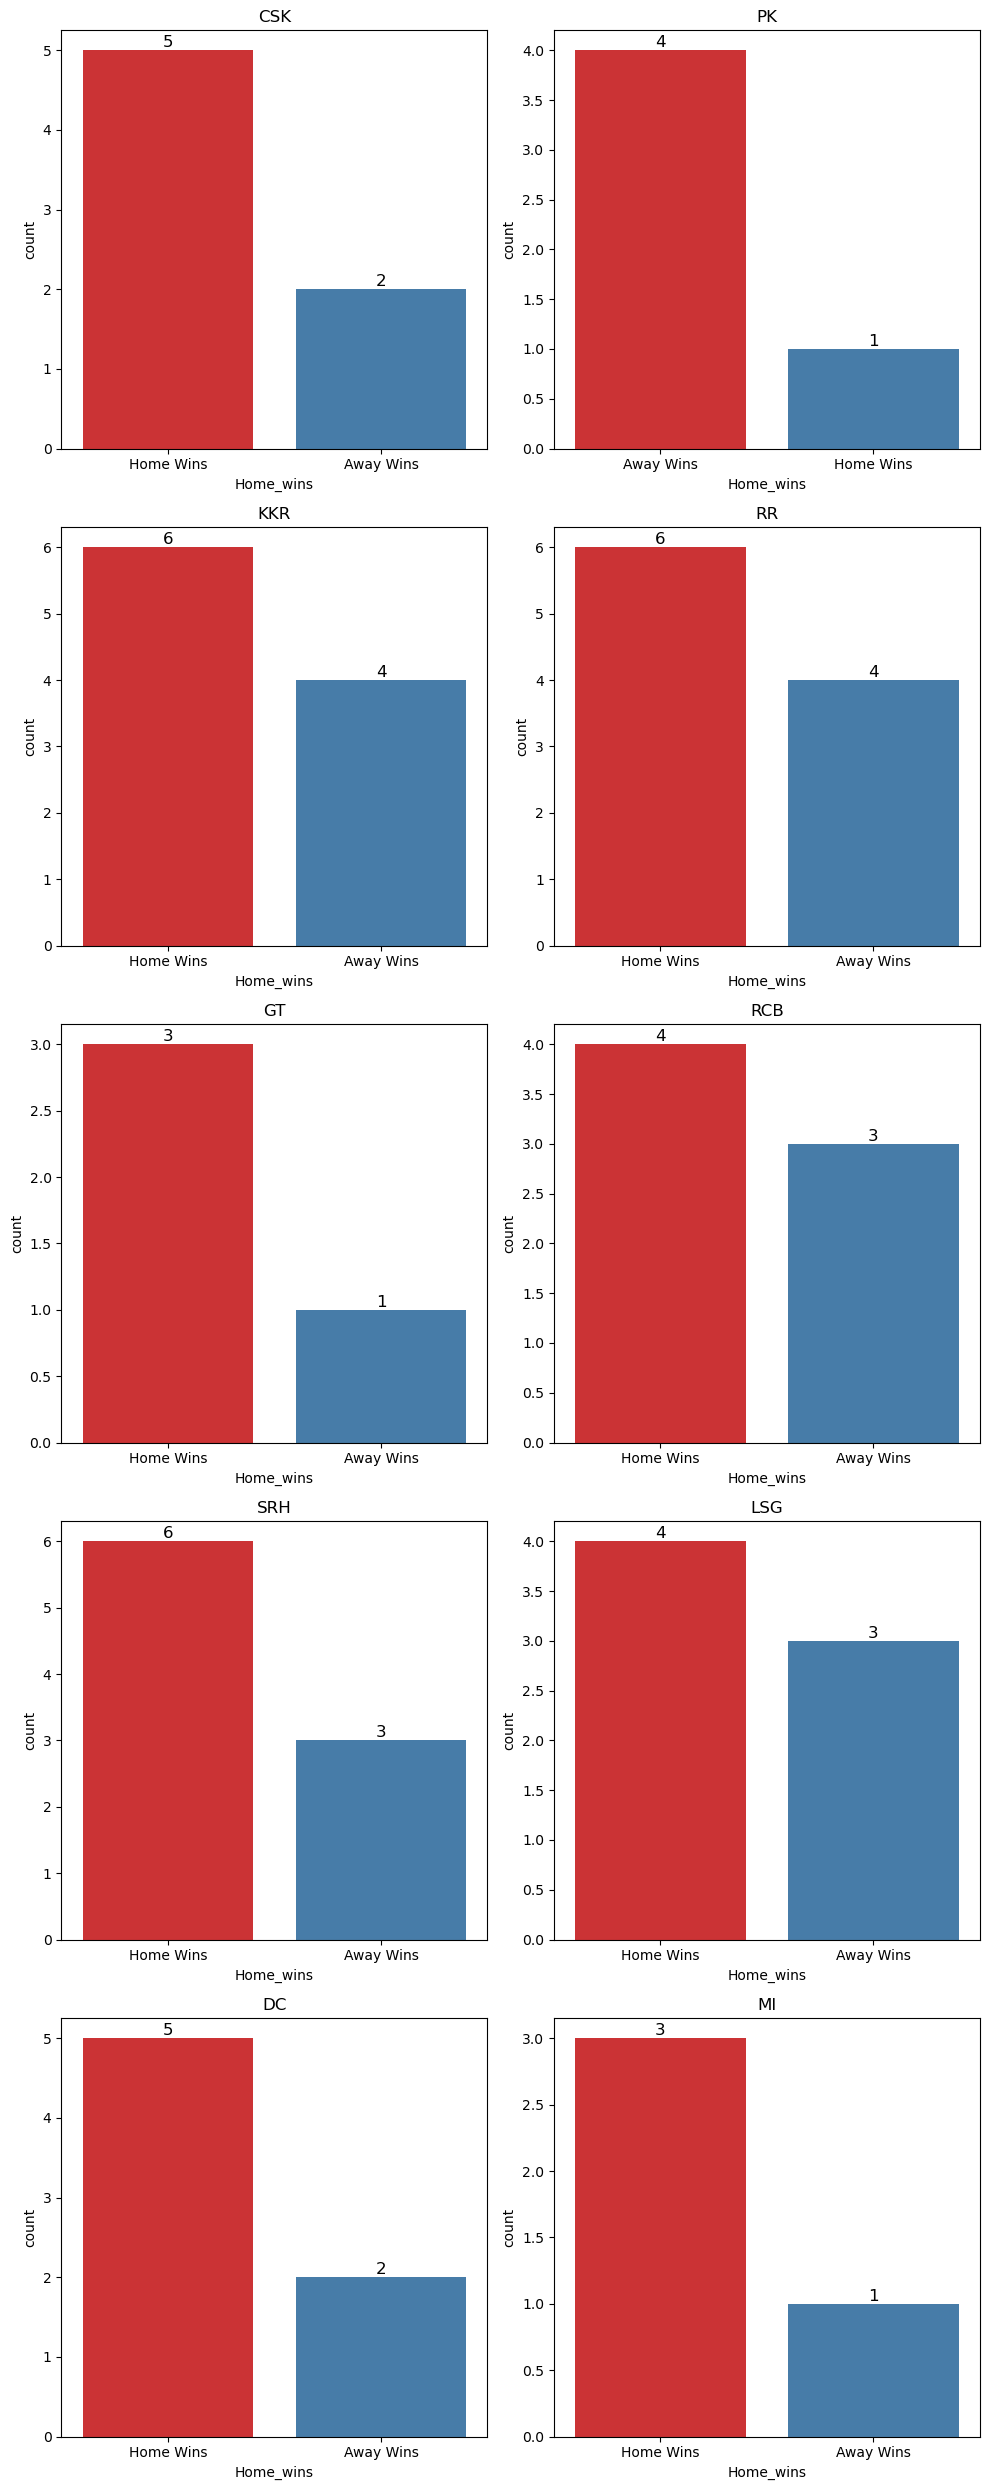

In [106]:
Teams=['CSK','PK','KKR','RR','GT','RCB','SRH','LSG','DC','MI']
ipl_2024['Home_wins']=ipl_2024['Home_wins'].replace(True,'Home Wins')
ipl_2024['Home_wins']=ipl_2024['Home_wins'].replace(False,'Away Wins')
num=0
mp.figure(figsize=(10,25))
for i in Teams:
    num+=1
    mp.subplot(5,2,num)
    Home_and_Away_wins=(ipl_2024[ipl_2024['winner']==i]['Home_wins'].value_counts())
    teams=sb.barplot(x=Home_and_Away_wins.keys(),y=Home_and_Away_wins,hue=Home_and_Away_wins.keys(),palette='Set1')
    teams.bar_label(teams.containers[0],fontsize=12)
    teams.bar_label(teams.containers[1],fontsize=12)
    mp.title(i)
mp.tight_layout()
mp.show()